In [1]:
import pandas as pd

# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# If needed, also expand the width
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)  # or a large int

from copy import deepcopy
from random import randint, choice
import random
import numpy as np

# Import Wedding_Solution and Wedding_GA_Solution classes
from library.wedding_solution import Wedding_Solution
from library.wedding_ga_solution import WeddingGASolution

# Import required for the selection, crossover, and mutation functions going to be uses in the GAs algorithms
from library.algorithms.genetic_algorithms.selection import fitness_proportionate_selection, ranking_selection, tournament_selection
from library.algorithms.genetic_algorithms.crossover import cycle_crossover, order_crossover
from library.algorithms.genetic_algorithms.mutation import greedy_swap_mutation, scramble_mutation, inversion_mutation, tableswap_mutation

# Import algorithm required to run the genetic algorithm
from library.algorithms.genetic_algorithms.genetic_algorithm import genetic_algorithm

# import the required function to run the different trials
from library.algorithms.hc_sa.run_trials_avg_fitness_per_iteration import run_trials_avg_fitness_per_iteration

## 1. Usage of the Wedding_Solution class

### 1.1 Demonstrating that the class works for any number of tables and guests — assuming guests can be evenly divided across tables

In [6]:
# Example usage of the Wedding_Solution class
tables = 4
attendees = 12
initial_solution = [1, 3, 1, 1, 4, 2, 4, 4, 3, 3, 2, 2]
repr_initial_solution = Wedding_Solution(repr=initial_solution, tables=tables, attendees=attendees)
print("ASSIGNED INITIALIZATION: ")
print("Repr: ", repr_initial_solution)
print("Seats per table: ", repr_initial_solution.seats_per_table)
print("Fitness: ", repr_initial_solution.fitness())

print("\nRANDOM INITIALIZATION: ")
repr = Wedding_Solution(tables=tables, attendees=attendees)
print("Repr: ", repr)
print("Seats per table: ", repr.seats_per_table)
print("Fitness: ", repr.fitness())

ASSIGNED INITIALIZATION: 
Repr:  [1, 3, 1, 1, 4, 2, 4, 4, 3, 3, 2, 2]
Seats per table:  3
Fitness:  7000

RANDOM INITIALIZATION: 
Repr:  [2, 2, 3, 3, 3, 4, 4, 1, 4, 1, 1, 2]
Seats per table:  3
Fitness:  8700


### 1.2 Usage of the class for the problem at hand with 8 tables and 64 attendees

In [7]:
repr = Wedding_Solution()
print(repr)
repr.pretty_print()

[5, 6, 2, 2, 1, 8, 6, 2, 8, 5, 3, 4, 6, 8, 3, 4, 8, 6, 3, 7, 8, 1, 8, 7, 2, 8, 7, 6, 2, 3, 1, 5, 5, 3, 7, 3, 7, 4, 7, 7, 5, 1, 1, 5, 7, 6, 3, 2, 4, 1, 1, 6, 6, 3, 2, 5, 5, 8, 4, 2, 4, 1, 4, 4]
----------SEATING ARRANGEMENTS----------
Table 1: [ 5, 22, 31, 42, 43, 50, 51, 62]
Table 2: [ 3,  4,  8, 25, 29, 48, 55, 60]
Table 3: [11, 15, 19, 30, 34, 36, 47, 54]
Table 4: [12, 16, 38, 49, 59, 61, 63, 64]
Table 5: [ 1, 10, 32, 33, 41, 44, 56, 57]
Table 6: [ 2,  7, 13, 18, 28, 46, 52, 53]
Table 7: [20, 24, 27, 35, 37, 39, 40, 45]
Table 8: [ 6,  9, 14, 17, 21, 23, 26, 58]
----------------------------------------


## 2. Selection Algorithms

- Fitness Proportionate Selection <span style="color:red">(from class)</span>
- Ranking
- Tournament

### 2.1 Ranking Selection

`Ranking Selection — Summary (Vanneschi et al.)`

Ranking selection is a selection method where individuals are chosen based on their **rank** in the population, not their raw fitness value.

`Main Idea`:
1. Individuals are sorted by fitness (from **worst** to **best**).
2. A selection probability is assigned based on the individual's **rank position**, using a monotonic function φ (e.g., linear, exponential).
3. This makes selection **robust to outliers** or large differences in fitness.

`Steps to Perform Ranking Selection`:
1. **Sort individuals** by fitness (worst to best).
2. **Assign ranks**: The worst gets rank 1, the best gets rank *n* (population size).
3. **Apply a ranking function** φ(rank), usually linear:
   - Example: Use the rank directly as weight.
4. **Compute probabilities**:
   - For each individual, use:  
     \[
     P(\text{select } i) = \frac{\phi(\text{rank}_i)}{\sum_{j=1}^{n} \phi(\text{rank}_j)}
     \]
5. **Sample** individuals using the computed probabilities.

`Important notes`:
- Unlike **fitness proportionate selection**, **ranking selection is not affected** by the magnitude of fitness values — only their ordering matters.
- If fitness values change but ranks stay the same, the probabilities remain unchanged.
- As emphasized by *Vanneschi et al.*, this stabilizes selection pressure and avoids dominance by outlier individuals.

 `When should we apply it`
- Useful when fitness values vary widely or are noisy.
- Ensures diversity by preventing premature convergence.




#### 2.1.1 Exemplifying usage of the Ranking Selection  

In [8]:
population = []
fitness_list = []
# Defining an initial population of 10 Wedding_Solution objects
for _ in range(1, 10):
    x = Wedding_Solution()
    population.append(x)
    fitness_list.append(x.fitness())

print(fitness_list)
print("--------")
# Determining the P' population based on the ranking selection algorithm
selected = ranking_selection(population=population, maximization=True)

[5900, 9300, 15800, 14400, 13900, 8300, 11400, 16400, 15800]
--------
----------SEATING ARRANGEMENTS----------
Table 1: [10, 15, 19, 32, 55, 56, 59, 62]
Table 2: [ 6, 29, 46, 47, 49, 50, 57, 63]
Table 3: [14, 23, 24, 31, 35, 45, 51, 64]
Table 4: [ 7, 21, 25, 38, 41, 42, 43, 52]
Table 5: [ 3,  5, 11, 20, 22, 30, 53, 60]
Table 6: [ 1,  9, 16, 26, 34, 37, 54, 58]
Table 7: [ 8, 13, 17, 18, 36, 40, 48, 61]
Table 8: [ 2,  4, 12, 27, 28, 33, 39, 44]
----------------------------------------


### 2.2 Tournament Selection

`Summary (Vanneschi et al.)`

Tournament Selection is a selection mechanism in Genetic Algorithms that balances **randomness** and **fitness-based selection** by conducting "tournaments" among randomly chosen individuals.


`Steps`:
1. **Choose `k` individuals** randomly from the population (with uniform probability).
2. **Evaluate the fitness** of these `k` individuals.
3. **Select the best individual** among the `k` (highest fitness if maximizing).
4. **Repeat** steps 1–3 each time a new parent is needed.

`Important Concepts`:
- `k` is called the **tournament size**.
- **Selection pressure** is controlled by `k`:
  - Small `k` → lower selection pressure → more diversity.
  - Large `k` → higher selection pressure → favors best individuals more often.
- With replacement: individuals can appear multiple times in a tournament, ensuring even the worst individual has a **non-zero** chance of being selected.
- Each tournament is **independent**, requiring a fresh random sample every time.

`Why should we apply it?`
- **Efficiency**: Only evaluates `k` individuals, not the whole population (unless elitism is used).
- **Tunable pressure**: Easily adjust the strength of selection by changing `k`.
- Unlike fitness proportionate selection (where pressure is fixed), or ranking selection (where tuning involves modifying a function φ), tournament selection **simplifies control** over selection behavior.

> This approach aligns with all three principles of a good selection mechanism as defined in *Vanneschi et al.*:
> 1. Includes randomness.
> 2. Considers fitness.
> 3. Gives all individuals a non-zero probability of selection.


#### 2.2.1 Exemplifying usage of the Tornament Selection  

In [9]:
population = []
fitness_list = []

# Defining an initial population of 9 Wedding_Solution objects
for _ in range(1, 10):
    x = Wedding_Solution()
    population.append(x)
    fitness_list.append(x.fitness())

print(fitness_list)
print("--------")

# Determining the P' population based on the tornament selection algorithm
selected = tournament_selection(population=population, maximization=True)

[13600, 15900, 12200, 8400, 16600, 11000, 13500, 12800, 9900]
--------
----------SEATING ARRANGEMENTS----------
Table 1: [20, 25, 30, 33, 42, 46, 49, 51]
Table 2: [ 4, 10, 16, 21, 29, 32, 40, 52]
Table 3: [17, 22, 24, 26, 28, 45, 53, 55]
Table 4: [ 1,  6, 19, 31, 34, 47, 58, 60]
Table 5: [ 5, 23, 41, 43, 48, 50, 56, 63]
Table 6: [ 2,  8, 35, 37, 54, 59, 61, 62]
Table 7: [ 7,  9, 14, 18, 38, 44, 57, 64]
Table 8: [ 3, 11, 12, 13, 15, 27, 36, 39]
----------------------------------------


In [10]:
##jfjfjfjfjfj 

## 3. Mutation

- swap mutation <span style="color:red">(from class)</span> <span style="color:orange">(check if greedy is different enough to use)</span> 
- scramble mutation
- inversion mutation <span style="color:red">(from class)</span>
- tableswap mutation

### 3.1 Greedy Swap Mutation


`Standard Swap Mutation: Summary`

Swap mutation is a general-purpose mutation operator commonly used with string or list-based representations. It introduces variability in the solution by swapping the values of two positions (genes) within the representation.

`Standard Swap Mutation: How it Works`
The standard version of swap mutation proceeds with the following steps:

1. **Mutation Probability Check**: With a certain mutation probability `mut_prob`, decide whether to mutate the solution.
2. **Select Two Genes**: Randomly pick two positions (`i` and `j`) in the list-based representation.
3. **Swap Values**: Exchange the values at these two positions to produce a new individual.
4. **Return the Mutated Representation**.

This operator introduces small, local changes while maintaining a valid representation structure.

---

`Greedy Swap Mutation: Summary`

The **greedy_swap_mutation** improves upon the standard method by making the swap *intelligent* based on relationship values defined in a fitness grid. Instead of choosing genes entirely at random, it prioritizes swaps that are **more likely to improve solution fitness**.

`Greedy Swap Mutation – Steps`

1. **Mutation Probability Check**:
   - With probability `mut_prob`, perform the mutation. Otherwise, return the unchanged representation.

2. **Select a Random Person A**:
   - Choose `randomPersonA` and identify the table they're currently seated at (`randomTableA`).

3. **Identify Valuable Relationships**:
   - Look up which guests have a **positive relationship** with `randomPersonA` using the fitness grid.
   - Sort these guests by value (descending) to prioritize better pairings.

4. **Select Person B**:
   - From the positively valued guests, find one (`randomPersonB`) who sits at a **different table** than `Person A`.
   - If no such person is found, randomly select one from another table.

5. **Pick Another Guest C from Table A**:
   - Randomly choose another guest `Person C` from `randomTableA` (excluding `Person A`) to participate in the swap.

6. **Perform the Swap**:
   - Swap `Person B` and `Person C` across tables, creating a new arrangement.

7. **Return the New Representation**.

---

`What Makes It Greedy?`

- Instead of choosing random guests to swap, this mutation:
  - Focuses on guests with **high positive relationship values**.
  - Prefers to move those with strong relational significance to better table contexts.
- The sorting of `peopleWithRelationship` in descending order ensures that higher-value swaps are attempted first.

---

`Benefits of Greedy Swap Mutation`

- Increases the **likelihood of fitness improvement** during mutation.
- Maintains diversity while adding **informed local search behavior**.
- Balances randomness (via `mut_prob`) with intelligent restructuring.

This approach blends **exploration** (random elements) with **exploitation** (relationship-based guidance), which is key in effective evolutionary algorithms.


#### 3.1.1 Exemplifying usage of the Greedy Swap Mutation

In [ ]:
# Wasn't working with old code - didn't work because it expected to receive a solution instance and not representation
"""
swap_repr = greedy_swap_mutation(repr.repr, repr.attendees, 1,  repr.values_grid)
print("Swapped: " + str(swap_repr.repr) + " Fitness: " + str(swap_repr.fitness()))
print("Original: " + str(repr.repr) + " Fitness: " + str(repr.fitness()))
"""


Swapped: [5, 6, 2, 2, 1, 8, 6, 2, 8, 5, 3, 4, 6, 8, 3, 4, 8, 6, 3, 7, 8, 1, 8, 3, 2, 8, 7, 6, 2, 3, 1, 5, 5, 3, 7, 7, 7, 4, 7, 7, 5, 1, 1, 5, 7, 6, 3, 2, 4, 1, 1, 6, 6, 3, 2, 5, 5, 8, 4, 2, 4, 1, 4, 4] Fitness: 16200
Original: [5, 6, 2, 2, 1, 8, 6, 2, 8, 5, 3, 4, 6, 8, 3, 4, 8, 6, 3, 7, 8, 1, 8, 7, 2, 8, 7, 6, 2, 3, 1, 5, 5, 3, 7, 3, 7, 4, 7, 7, 5, 1, 1, 5, 7, 6, 3, 2, 4, 1, 1, 6, 6, 3, 2, 5, 5, 8, 4, 2, 4, 1, 4, 4] Fitness: 14200


In [18]:
new_repr = greedy_swap_mutation(repr.repr, 1, repr.values_grid)
swap_solution = Wedding_Solution(repr=new_repr)
print("Swapped: " + str(swap_solution.repr) + " Fitness: " + str(swap_solution.fitness()))
print("Original: " + str(repr.repr) + " Fitness: " + str(repr.fitness()))

Swapped: [5, 6, 2, 2, 1, 8, 6, 2, 8, 5, 3, 4, 6, 8, 3, 4, 8, 6, 3, 7, 8, 1, 8, 1, 2, 8, 7, 6, 2, 3, 1, 5, 5, 3, 7, 3, 7, 4, 7, 7, 5, 1, 7, 5, 7, 6, 3, 2, 4, 1, 1, 6, 6, 3, 2, 5, 5, 8, 4, 2, 4, 1, 4, 4] Fitness: 14900
Original: [5, 6, 2, 2, 1, 8, 6, 2, 8, 5, 3, 4, 6, 8, 3, 4, 8, 6, 3, 7, 8, 1, 8, 7, 2, 8, 7, 6, 2, 3, 1, 5, 5, 3, 7, 3, 7, 4, 7, 7, 5, 1, 1, 5, 7, 6, 3, 2, 4, 1, 1, 6, 6, 3, 2, 5, 5, 8, 4, 2, 4, 1, 4, 4] Fitness: 14200


### 3.2 Scramble Mutation

`Scramble Mutation — Summary (Soni et al., 2014)`

Scramble mutation is a general-purpose mutation operator used with **permutation-based encodings**, such as seating arrangements or TSP tours. It introduces diversity by **randomly reordering** a selected subset of genes (individual positions) in a solution.

`Steps`:
1. **Mutation Probability Check**:
   - With probability `mut_prob`, perform the mutation. Otherwise, return the solution unchanged.

2. **Select a Subset of Genes**:
   - Choose a random starting index and define a range of contiguous genes (up to a maximum length) to be scrambled.

3. **Shuffle the Subset**:
   - Randomly rearrange the selected genes using a uniform shuffle.

4. **Replace the Original Subset**:
   - Insert the shuffled subset back into the original representation at the same positions.

5. **Return the New Representation**.

`Key Features`:
- The operation preserves the overall set of values, maintaining the validity of the permutation.
- The **disruption is localized**, making it a good balance between exploration and structure preservation.
- Although the literature (Soni et al., 2014) allows for non-contiguous subsets, a contiguous range is commonly used in practice and simplifies implementation.

`Why Use Scramble Mutation?`
- Helps **escape local optima** by introducing moderate changes.
- Useful in problems like the **Travelling Salesman Problem** or **wedding seating**, where order matters but must stay valid.
- It retains feasibility while exploring alternative arrangements.

> Referenced from: *Soni, N., & Kumar, T. (2014). Study of Various Mutation Operators in Genetic Algorithms. IJCSIT, 5(3), 4519–4521.*
>
> Source: https://www.ijcsit.com/docs/Volume%205/vol5issue03/ijcsit20140503404.pdf


#### 3.2.1 Exemplifying usage of the Scramble Mutation

In [16]:
# Wasn't working with old code - didn't work because it expected to receive a solution instance and not representation
"""
scramble_repr = scramble_mutation(repr.repr, repr.attendees, 1)
print("Scrambled: " + str(scramble_repr.repr) + " Fitness: " + str(scramble_repr.fitness()))
print("Original: " + str(repr.repr) + " Fitness: " + str(repr.fitness()))
"""

'\nscramble_repr = scramble_mutation(repr.repr, repr.attendees, 1)\nprint("Scrambled: " + str(scramble_repr.repr) + " Fitness: " + str(scramble_repr.fitness()))\nprint("Original: " + str(repr.repr) + " Fitness: " + str(repr.fitness()))\n'

In [19]:
scramble_repr = scramble_mutation(repr.repr, 1)
scramble_solution = Wedding_Solution(repr=scramble_repr)

print("Inverted: " + str(scramble_solution.repr) + " Fitness: " + str(scramble_solution.fitness()))
print("Original: " + str(repr.repr) + " Fitness: " + str(repr.fitness()))

Inverted: [5, 6, 2, 2, 1, 8, 6, 2, 8, 5, 3, 4, 6, 8, 3, 4, 8, 6, 3, 7, 8, 1, 8, 7, 2, 8, 7, 6, 2, 3, 1, 5, 5, 3, 7, 3, 7, 4, 7, 7, 5, 1, 1, 5, 7, 6, 3, 2, 4, 1, 1, 6, 6, 5, 2, 5, 2, 8, 3, 4, 4, 1, 4, 4] Fitness: 15300
Original: [5, 6, 2, 2, 1, 8, 6, 2, 8, 5, 3, 4, 6, 8, 3, 4, 8, 6, 3, 7, 8, 1, 8, 7, 2, 8, 7, 6, 2, 3, 1, 5, 5, 3, 7, 3, 7, 4, 7, 7, 5, 1, 1, 5, 7, 6, 3, 2, 4, 1, 1, 6, 6, 3, 2, 5, 5, 8, 4, 2, 4, 1, 4, 4] Fitness: 14200


### 3.3 Inversion Mutation


`Inversion Mutation — Summary (Soni et al., 2014)`

Inversion mutation is a classic operator used in **permutation-encoded chromosomes**, such as TSP tours or seating arrangements. It introduces diversity by **reversing the order** of a randomly selected subsequence within the solution.

`Steps`:
1. **Mutation Probability Check**:
   - With probability `mut_prob`, perform the mutation. Otherwise, return the solution unchanged.

2. **Select a Random Subsequence**:
   - Choose two positions (start and end) in the representation to define the range for inversion.

3. **Invert the Subsequence**:
   - Reverse the order of the genes (attendees) between the two positions.

4. **Replace the Original Substring**:
   - Insert the reversed subsequence back into the representation.

5. **Return the New Solution**.

`Key Features`:
- Preserves the set of individuals and their counts (valid permutation).
- Maintains most **adjacency structure**, breaking only the two boundary links.
- Especially useful for **exploring permutations** with minimal disruption.

> As explained in Soni et al. (2014), inversion mutation works by selecting two alleles and reversing the substring between them. This operator is effective in problems where preserving partial order is beneficial.

`Why Use Inversion Mutation?`
- Balances exploration and stability.
- Useful in optimization problems involving **ordering**, such as the **wedding seating problem**, where altering small segments may yield better arrangements without completely destroying structure.

> Referenced from: *Soni, N., & Kumar, T. (2014). Study of Various Mutation Operators in Genetic Algorithms. IJCSIT, 5(3), 4519–4521.*
>
> Source: https://www.ijcsit.com/docs/Volume%205/vol5issue03/ijcsit20140503404.pdf


#### 3.3.1 Exemplifying usage of the Inversion Mutation

In [21]:
inverted_repr = inversion_mutation(repr.repr, 1)
inverted_solution = Wedding_Solution(repr=inverted_repr)

print("Inverted: " + str(inverted_solution.repr) + " Fitness: " + str(inverted_solution.fitness()))
print("Original: " + str(repr.repr) + " Fitness: " + str(repr.fitness()))

Inverted: [5, 6, 2, 2, 1, 8, 6, 2, 8, 5, 3, 4, 6, 8, 3, 4, 8, 6, 3, 7, 2, 6, 7, 8, 2, 7, 8, 1, 8, 3, 1, 5, 5, 3, 7, 3, 7, 4, 7, 7, 5, 1, 1, 5, 7, 6, 3, 2, 4, 1, 1, 6, 6, 3, 2, 5, 5, 8, 4, 2, 4, 1, 4, 4] Fitness: 15300
Original: [5, 6, 2, 2, 1, 8, 6, 2, 8, 5, 3, 4, 6, 8, 3, 4, 8, 6, 3, 7, 8, 1, 8, 7, 2, 8, 7, 6, 2, 3, 1, 5, 5, 3, 7, 3, 7, 4, 7, 7, 5, 1, 1, 5, 7, 6, 3, 2, 4, 1, 1, 6, 6, 3, 2, 5, 5, 8, 4, 2, 4, 1, 4, 4] Fitness: 14200


### 3.4 TableSwap Mutation

`Summary`:

Corresponds to a **custom problem-specific mutation** operator designed for the wedding seating optimization problem. It aims to introduce diversity by selecting **one individual per table** and **shuffling their table assignments**. Unlike classical mutation operators, this mutation preserves table balance while promoting cross-table variation in a structured and low-disruption way.


`Steps`:

1. **Mutation Probability Check**:
   - With probability `mut_prob`, apply the mutation.
   - If not chosen, return the representation unchanged.

2. **Determine Number of Tables**:
   - Identify the number of unique tables in the representation.

3. **Select One Guest per Table**:
   - For each table, randomly choose one individual seated at that table.
   - Store these selected individuals in a list (`peopleToSwap`).

4. **Shuffle Table Assignments**:
   - Randomly shuffle the selected individuals' table assignments.
   - Ensure that the shuffled result differs from the original (to avoid no-ops).

5. **Reassign Guests to New Tables**:
   - For each selected individual, reassign them to the table corresponding to their new position in the shuffled list.

6. **Return the Mutated Representation**:
   - Output the modified solution where only the selected individuals changed tables.



`Key Features`:

- Preserves **table capacity balance** (one guest moved from each table).
- Introduces **cross-table diversity** without major disruption to overall layout.
- **Domain-specific**: tailored to problems where partitions (e.g., tables) must remain balanced.
- Offers a **structured alternative** to more disruptive mutations like scramble or inversion.


` Why Use TableSwap Mutation?`

- Ensures **valid configurations** by design.
- Useful for promoting gradual exploration across tables.
- Balances **exploration** and **stability**, making it ideal for real-world constraints like seating plans.



#### 3.4.1 Exemplifying usage of the TableSwap Mutation

In [ ]:
# Defining initial values for the tables and attendees using the Wedding_Solution class

tables = 8
attendees = 64
repr_2 = Wedding_Solution(tables=tables, attendees=attendees)

print(repr_2)
print("Fitness: " + str(repr_2.fitness()))
repr_2.pretty_print()



[4, 6, 1, 4, 3, 8, 5, 2, 5, 8, 1, 7, 5, 6, 5, 2, 6, 7, 1, 3, 8, 8, 4, 8, 7, 8, 6, 6, 2, 2, 4, 1, 3, 3, 4, 5, 6, 2, 3, 5, 1, 7, 2, 4, 2, 1, 2, 8, 6, 3, 1, 4, 5, 5, 7, 3, 3, 6, 8, 7, 7, 7, 1, 4]
Fitness: 10000
----------SEATING ARRANGEMENTS----------
Table 1: [ 3, 11, 19, 32, 41, 46, 51, 63]
Table 2: [ 8, 16, 29, 30, 38, 43, 45, 47]
Table 3: [ 5, 20, 33, 34, 39, 50, 56, 57]
Table 4: [ 1,  4, 23, 31, 35, 44, 52, 64]
Table 5: [ 7,  9, 13, 15, 36, 40, 53, 54]
Table 6: [ 2, 14, 17, 27, 28, 37, 49, 58]
Table 7: [12, 18, 25, 42, 55, 60, 61, 62]
Table 8: [ 6, 10, 21, 22, 24, 26, 48, 59]
----------------------------------------


In [ ]:
# Implementing the tableswap mutation
result = tableswap_mutation(repr_2.repr, 1)

[41, 38, 57, 31, 40, 58, 55, 59]
[59, 57, 58, 41, 55, 31, 38, 40]


In [ ]:
# Check the result of the tableswap mutation
result_solution = Wedding_Solution(repr=result)
result_solution.pretty_print()

----------SEATING ARRANGEMENTS----------
Table 1: [ 3, 11, 19, 32, 46, 51, 59, 63]
Table 2: [ 8, 16, 29, 30, 43, 45, 47, 57]
Table 3: [ 5, 20, 33, 34, 39, 50, 56, 58]
Table 4: [ 1,  4, 23, 35, 41, 44, 52, 64]
Table 5: [ 7,  9, 13, 15, 36, 53, 54, 55]
Table 6: [ 2, 14, 17, 27, 28, 31, 37, 49]
Table 7: [12, 18, 25, 38, 42, 60, 61, 62]
Table 8: [ 6, 10, 21, 22, 24, 26, 40, 48]
----------------------------------------


## 4. Crossover

- <s>standard crossover</s> <span style="color:red">not usable</span>
- cycle crossover <span style="color:red">(from class)</span>
- order crossover <span style="color:red">(from chatgpt)</span>

In [ ]:
repr_3 = Wedding_Solution(tables=tables, attendees=attendees)
print(repr_3)
print("Fitness: " + str(repr_3.fitness()))
repr_3.pretty_print()

### 4. 0 Standard Crossover

> Standard Crossover can't work as the number of tables assigned have to be a certain number

In [ ]:
# def standard_crossover(parent1_repr, parent2_repr):

#     crossoverPoint = randint(1, len(parent1_repr)-1) # cant be 0
#     print("CrossOver Point: " + str(crossoverPoint))
#     child1_repr = parent1_repr[:crossoverPoint] + parent2_repr[crossoverPoint:]
#     child2_repr = parent2_repr[:crossoverPoint] + parent1_repr[crossoverPoint:]

#     print("Child1: ",child1_repr)
#     print("Child2: ",child2_repr)

#     return [Wedding_Solution(repr=child1_repr), Wedding_Solution(repr=child2_repr)]

In [ ]:
# inversion_repr = standard_crossover(repr.repr, repr_2.repr)
# # print(inversion_repr)
# print(repr.repr)
# print(repr_2.repr)
# print("-------")
# print(inversion_repr[0].repr)
# print(inversion_repr[1].repr)

### 4.1 Cycle Crossover – Adapted for Our Problem


`General approach (Vanneschi et al.)`
Cycle crossover (CX) is a genetic operator for permutation-based representations. It ensures each gene in the offspring appears exactly once by:
- Starting from a random index,
- Tracing a cycle using value positions across parents,
- Copying cycle positions from Parent 1, and the rest from Parent 2.

`Problem with Our Use Case`
In our wedding seating problem, values (table numbers) **repeat**, unlike in permutations. This breaks the classic CX logic, which assumes **unique values**.

`Our Adaptation`
We modified CX to work with **non-unique values**:
- Built dictionaries mapping each table number to its list of positions in each parent.
- Traversed cycles using index positions, not values.
- Inherited values from Parent 1 at cycle positions, and from Parent 2 elsewhere.

`Summary of Steps in our adaptation`
1. Pick a random starting index.
2. Build position mappings for both parents.
3. Traverse the cycle by following table assignments through mapped indices.
4. Create offspring by copying:
   - Values from Parent 1 at cycle indices,
   - Values from Parent 2 at non-cycle indices.

> Adapted CX retains structural benefits while supporting repeated values — essential for table assignments.


#### 4.1.1 Exemplifying usage of the Adapted Cycle Crossover

In [33]:
# Define consistent settings
tables = 4
attendees = 16

# Generate two random parent solutions
parent1 = Wedding_Solution(tables=tables, attendees=attendees)
parent2 = Wedding_Solution(tables=tables, attendees=attendees)

# Apply adapted cycle crossover
offspring_repr1, offspring_repr2 = cycle_crossover(parent1.repr, parent2.repr)

# Display results
print("Parent 1:")
print(parent1.repr)
print("Parent 2:")
print(parent2.repr)
print("------ Crossover Result ------")
print("Offspring 1:")
print(offspring_repr1)
print("Offspring 2:")
print(offspring_repr2)


Parent 1:
[4, 1, 1, 1, 3, 3, 4, 4, 3, 2, 3, 4, 2, 2, 2, 1]
Parent 2:
[2, 2, 4, 3, 2, 1, 3, 2, 1, 3, 4, 4, 3, 1, 4, 1]
------ Crossover Result ------
Offspring 1:
[4, 2, 4, 3, 2, 1, 3, 2, 1, 3, 4, 4, 3, 1, 2, 1]
Offspring 2:
[2, 1, 1, 1, 3, 3, 4, 4, 3, 2, 3, 4, 2, 2, 4, 1]


### 4.2 Order Crossover

#### Modified Order Crossover (MOC)

`1. Summary`

Modified Order Crossover (MOC) is a permutation-preserving crossover operator designed for problems like the Travelling Salesman Problem (TSP), where offspring must represent valid permutations.

`Core Idea`
Instead of selecting multiple random positions, MOC:
- Selects a **single crossover point**.
- **Inherits all genes to the right** of this point from one parent.
- Then fills the remaining genes from the other parent, **preserving order** and **excluding duplicates**.

`Steps`
1. Randomly choose a **crossover point**.
2. Copy all genes **to the right** of the crossover point from Parent 1 into Offspring 1.
3. Fill the **remaining genes** from Parent 2, in order, **skipping values already present**.
4. Apply the same logic in reverse for Offspring 2.

> Reference: Umbarkar *et al.* (2015) – *Crossover Operators in Genetic Algorithms: A Review*
>
> Source: https://ictactjournals.in/paper/IJSC_V6_I1_paper_4_pp_1083_1092.pdf

---

#### Our Approach – Inspired by MOC

`Summary`
Our crossover logic follows the same goal of recombining parts of both parents while preserving structure, but differs in implementation:

`Differences from MOC`
- Instead of copying the full **right substring**, we:
  - Select a **random mid-segment** (of limited length) from each parent.
- Fill the rest of the offspring using the **relative order** of the other parent (excluding duplicated values).
- This introduces more **localized variation** and **higher diversity** across trials.

`Steps in Our Adaptation`
1. Randomly select a **substring** (e.g., 2 to 10 positions) from each parent.
2. Insert these substrings in the same index range of the offspring.
3. From the other parent, remove values in the substring and **preserve their order**.
4. Fill remaining positions around the inserted substring to complete the offspring.


`Why This Works`
This adaptation maintains the core idea of order preservation and value uniqueness while offering more flexible disruption. It is better suited for our **wedding seating optimization** problem where the solution is **not a strict permutation** but still benefits from **balanced inheritance** of structure.



#### 4.2.1 Exemplifying usage of the Adapted Order Crossover

In [36]:
tables = 4
attendees = 16

# Generate two parent solutions
parent1 = Wedding_Solution(tables=tables, attendees=attendees)
parent2 = Wedding_Solution(tables=tables, attendees=attendees)

# Apply the adapted order crossover
offspring1, offspring2 = order_crossover(parent1.repr, parent2.repr)

# Display input parents and resulting offspring
print("Parent 1:", parent1.repr)
print("Parent 2:", parent2.repr)
print("------ Order Crossover Result ------")
print("Offspring 1:", offspring1)
print("Offspring 2:", offspring2)

Parent 1: [4, 2, 1, 4, 1, 3, 2, 4, 1, 1, 2, 2, 3, 4, 3, 3]
Parent 2: [3, 2, 3, 2, 1, 3, 4, 4, 4, 1, 2, 2, 4, 1, 1, 3]
------ Order Crossover Result ------
Offspring 1: [3, 2, 3, 2, 1, 3, 4, 4, 4, 1, 2, 2, 3, 4, 1, 1]
Offspring 2: [4, 2, 1, 4, 1, 3, 2, 4, 1, 1, 2, 2, 4, 3, 3, 3]


### FOR UNDERSTANDING THE ORDER CROSSOVER
(Click to view better)

[2, 3, 3, 4, 4, 1, 2, 3, 1, 2, 2, 3, 4, 1, 1, 4] <- parent 1
[1, 1, 1, 2, 4, 2, 4, 2, 1, 3, 3, 2, 4, 3, 3, 4] <- parent 2

Make offspring 1
[4, 4, 1, 2, 3, 1, 2] < will copy from parent 1 to child 1 (subseciton 1)

[1, 1, 1, 2, 4, 2, 4, 2, 1, 3, 3, 2, 4, 3, 3, 4] <- parent 2
[1, 1, _, 2, 4, 2, 4, _, _, 3, 3, _, _, 3, _, _] <- parent 2 (removed the last versions of the numbers using subsection 1)

[1, 1, 2,                      4, 2, 4, 3, 3, 3] < - parent 2 condensed
[_, _, _, 4, 4, 1, 2, 3, 1, 2, _, _, _, _, _, _] < - offspring 1

[1, 1, 2, 4, 4, 1, 2, 3, 1, 2, 4, 2, 4, 3, 3, 3] < - complete offspring 1

------------------------------------------------

Make offspring 2
[2, 4, 2, 4, 2, 1, 3] < will copy from parent 2 to child 2 (subseciton 2)

[2, 3, 3, 4, 4, 1, 2, 3, 1, 2, 2, 3, 4, 1, 1, 4] <- parent 1
[2, 3, 3, 4, 4, 1, _, 3, 1, _, _, _, _, 1, _, _] <- parent 1 (removed the last versions of the numbers using subsection 1)

[2, 3, 3,                      4, 4, 1, 3, 1, 1] < - parent 1 condensed
[_, _, _, 2, 4, 2, 4, 2, 1, 3, _, _, _, _, _, _] < - offspring 2

[2, 3, 3, 2, 4, 2, 4, 2, 1, 3, 4, 4, 1, 3, 1, 1] < - complete offspring 1

------------------------------------------------

[1, 1, 2, 4, 4, 1, 2, 3, 1, 2, 4, 2, 4, 3, 3, 3] < - offspring 1
[2, 3, 3, 2, 4, 2, 4, 2, 1, 3, 4, 4, 1, 3, 1, 1] < - offspring 2

In [ ]:
#order1 = Wedding_Solution(repr=order_repr[0], tables=tables, attendees=attendees)
#order1.pretty_print()

In [ ]:
#order2 = Wedding_Solution(repr=order_repr[1], tables=tables, attendees=attendees)
#order2.pretty_print()

## 5. Comparing different setups for the Genetic algorithms


Trial 1/2
Number of generations:  5
Mutation: greedy_swap_mutation, Crossover: cycle_crossover, Selection: fitness_proportionate_selection
Best solution fitness: 25000
Trial 2/2
Number of generations:  5
Mutation: greedy_swap_mutation, Crossover: cycle_crossover, Selection: fitness_proportionate_selection
Best solution fitness: 33200
Debug 1 - run_trials_function (remove later):[[19200, 19400, 22400, 23100, 24300, 25000], [21400, 24700, 25600, 31800, 33200, 33200]] 


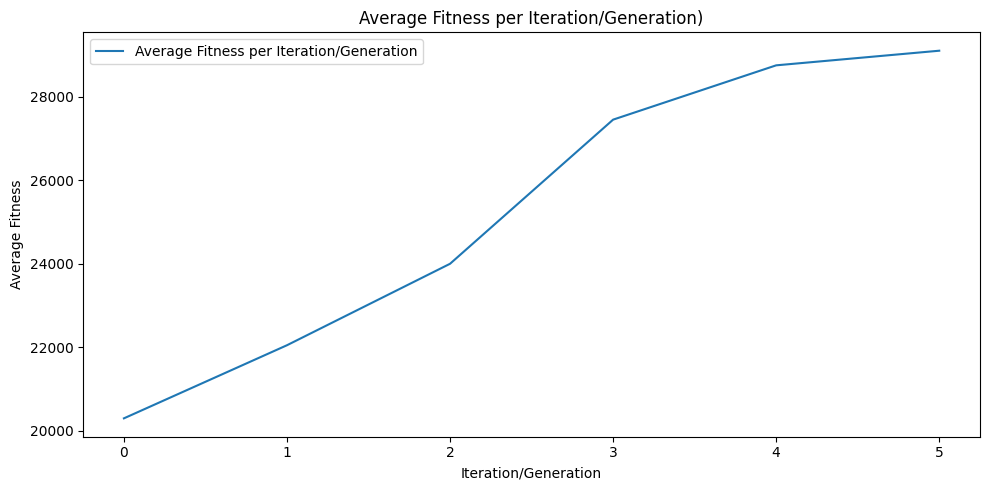

In [3]:
ga_best_solutions, ga_all_fitness_histories, ga_avg_fitness_per_iter = run_trials_avg_fitness_per_iteration(
    optimization_algo="GA",
    trials=2,
    max_iter=5,
    verbose=False,

    # GA-specific
    mutation_function=greedy_swap_mutation,
    crossover_function=cycle_crossover,
    selection_algorithm=fitness_proportionate_selection,
    pop_size=10,
    xo_prob=0.8,
    mut_prob=1,
    elitism=True
)


### Suggested Evaluation Approach for GA Configurations (Staged + Statistical Testing)

To avoid testing all 36 combinations (3 selection × 4 mutation × 3 crossover), we use a **controlled staged testing strategy** and assess statistical significance at the end.

---

#### Step 1: Fix Selection + Crossover → Test All Mutations

| What is fixed           | Value (Example)                   |
|-------------------------|-----------------------------------|
| Selection               | `tournament_selection`            |
| Crossover               | `cycle_crossover`                 |

🧪 **Vary mutation only**:
- `greedy_swap_mutation`
- `scramble_mutation`
- `inversion_mutation`
- `tableswap_mutation`

Select the **best-performing mutation** based on average fitness over 30 trials.

---

#### ✅ Step 2: Fix Best Mutation + Same Crossover → Test All Selection Methods

| What is fixed           | Value                             |
|-------------------------|-----------------------------------|
| Mutation                | ✅ From Step 1                     |
| Crossover               | Same as Step 1 (`cycle_crossover`) |

**Vary selection only**:
- `fitness_proportionate_selection`
- `ranking_selection`
- `tournament_selection`

Select the **best-performing selection** method.

---

#### Step 3: Fix Best Mutation + Best Selection → Test All Crossover Methods

| What is fixed           | Value                             |
|-------------------------|-----------------------------------|
| Mutation                | ✅ From Step 1                     |
| Selection               | ✅ From Step 2                     |

🧪 **Vary crossover only**:
- `cycle_crossover`
- `order_crossover`
- (optional) `uniform_crossover`

Select the **best crossover**.

---

#### Step 4: Final Evaluation + Statistical Significance

- Run 30 trials for:
  - Best GA configuration (from steps above)
  - Best SA configuration
  - Best HC configuration

- **Evaluate** using:
  - `avg_fitness_per_iteration` (for convergence plots)
  - `final_fitness_values` (for statistical testing)

- **Run statistical test** using:

```python
evaluate_statistical_significance_differece_algorithm_fitnesses(
    ga_best_final_fitnesses,
    hc_best_final_fitnesses,
    label_1="GA",
    label_2="HC"
)
